<a href="https://drive.google.com/drive/folders/176VLvhLVMz4-ZFKh1uHpCijZJfQWd-6w?usp=sharing">Link to the dataset</a>


<blockquote>
Utility function declaration
</blockquote>

In [1]:
# input: Pandas DataFrame named data
# output: print a summary of the passing Pandas DataFrame 
def printSummary(data):
    print('Number of objects = {}'.format(data.shape[0]))
    print('Number of attributes = {}'.format(data.shape[1]))
    print('   | Column                      | Missing values | Infinity values')
    print('-------------------------------------------------------------------')
    i = 0
    for col_label in data.columns:
        print('{0:2d} | {1:27s} | {2:14d} | {3:15d}'.format(i, col_label, data[col_label].isnull().sum(), data[col_label].isin([np.inf]).sum()))
        i = i + 1
    print('-------------------------------------------------------------------')

# 1. Data cleaning 

In [2]:
import pandas as pd
import numpy as np
import warnings
# suppress the warning caused by setting the first column as index column
warnings.simplefilter(action='ignore', category=FutureWarning) 
data = pd.read_csv('cic2017-ddos-data.csv', index_col=0, header=0)
# dataset contains infinite values in some columns
data = data.replace('inf', np.inf)

print('Dataset before cleaning:')
printSummary(data)
print('Label column information:')
print(data.loc[:, 'Label'].describe())

Dataset before cleaning:
Number of objects = 755663
Number of attributes = 85
   | Column                      | Missing values | Infinity values
-------------------------------------------------------------------
 0 | Flow ID                     |              0 |               0
 1 | Source IP                   |              0 |               0
 2 | Source Port                 |              0 |               0
 3 | Destination IP              |              0 |               0
 4 | Destination Port            |              0 |               0
 5 | Protocol                    |              0 |               0
 6 | Timestamp                   |              0 |               0
 7 | Flow Duration               |              0 |               0
 8 | Total Fwd Packets           |              0 |               0
 9 | Total Backward Packets      |              0 |               0
10 | Total Length of Fwd Packets |              0 |               0
11 | Total Length of Bwd Packets |    

In [3]:
data = data.replace(np.nan, np.inf)
data['Flow Bytes/s'].replace(np.inf, data['Flow Bytes/s'].median(), inplace=True)
data['Flow Packets/s'].replace(np.inf, data['Flow Packets/s'].median(), inplace=True)

print('Dataset after cleaning:')
printSummary(data)

Dataset after cleaning:
Number of objects = 755663
Number of attributes = 85
   | Column                      | Missing values | Infinity values
-------------------------------------------------------------------
 0 | Flow ID                     |              0 |               0
 1 | Source IP                   |              0 |               0
 2 | Source Port                 |              0 |               0
 3 | Destination IP              |              0 |               0
 4 | Destination Port            |              0 |               0
 5 | Protocol                    |              0 |               0
 6 | Timestamp                   |              0 |               0
 7 | Flow Duration               |              0 |               0
 8 | Total Fwd Packets           |              0 |               0
 9 | Total Backward Packets      |              0 |               0
10 | Total Length of Fwd Packets |              0 |               0
11 | Total Length of Bwd Packets |     

# 2. Data preprocessing

In [4]:
print('Number of matching values of two columns \"Fwd Header Length\" and \"Fwd Header Length - dupl\": {}'.format(data['Fwd Header Length'].eq(data['Fwd Header Length - dupl']).sum()))
# drop two duplicated columns
data = data.drop(['Fwd Header Length - dupl'], axis=1)
print('Dataset after dropping duplicated column: ')
print('Number of instances = {}'.format(data.shape[0]))
print('Number of attributes = {}'.format(data.shape[1]))

Number of matching values of two columns "Fwd Header Length" and "Fwd Header Length - dupl": 755663
Dataset after dropping duplicated column: 
Number of instances = 755663
Number of attributes = 84


In [5]:
from sklearn.decomposition import PCA

numInstances = data.shape[0]
numComponents = 10
pca = PCA(n_components=numComponents)
pca.fit(data.loc[:, 'Flow Duration':'Idle Min'])

projected = pca.transform(data.loc[:, 'Flow Duration':'Idle Min'])
projected = pd.DataFrame(projected,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=range(numInstances))
projected.head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.408698e+07,535254.149989,1.453473e+06,902919.373947,-355285.291540,171524.876162,-327207.474978,-4822.703561,-770.486636,-124251.620605
1,-2.418045e+07,590354.229422,1.046009e+07,855603.211236,-344858.757347,166728.122665,-320211.333372,-6069.926904,-1159.470864,-123116.748409
2,-2.418045e+07,590354.229422,1.046009e+07,855603.211236,-344858.757347,166728.122665,-320211.333372,-6069.926904,-1159.470864,-123116.748409
3,-2.418045e+07,590354.229422,1.046009e+07,855603.211236,-344858.757347,166728.122665,-320211.333372,-6069.926904,-1159.470864,-123116.748409
4,-2.409737e+07,541376.130439,2.454209e+06,897662.006552,-354127.868235,170991.814487,-326431.142567,-4961.289009,-813.706905,-124125.444108
5,-2.418045e+07,590354.237739,1.046009e+07,855603.212160,-344858.761112,166728.129348,-320211.360791,-6069.926806,-1159.470347,-123116.732620
6,-2.418045e+07,590354.237739,1.046009e+07,855603.212160,-344858.761112,166728.129348,-320211.360791,-6069.926806,-1159.470347,-123116.732620
7,-2.418045e+07,590354.237739,1.046009e+07,855603.212160,-344858.761112,166728.129348,-320211.360791,-6069.926806,-1159.470347,-123116.732620
8,-2.406981e+07,525823.842928,-7.425198e+04,910603.316790,-357069.962224,172771.801627,-328173.231498,-3890.344237,-922.235321,-124387.557551
9,-2.409601e+07,547006.832824,2.682668e+06,888217.027011,-355215.754222,175465.325020,-331051.054511,2589.154235,-2147.367143,-138906.342412


In [6]:
from sklearn.model_selection import train_test_split

new = pd.concat([data.iloc[:, 0:7], projected, data.iloc[:, 83]], axis=1)
print('Dataset after performing PCA:')
printSummary(new)

y = new.loc[:, 'Label']
x = new.drop(['Label'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
print('Number of objects in training set: {}'.format(x_train.shape[0]))
print('Number of objects in testing set:  {}'.format(x_test.shape[0]))

Dataset after performing PCA:
Number of objects = 755663
Number of attributes = 18
   | Column                      | Missing values | Infinity values
-------------------------------------------------------------------
 0 | Flow ID                     |              0 |               0
 1 | Source IP                   |              0 |               0
 2 | Source Port                 |              0 |               0
 3 | Destination IP              |              0 |               0
 4 | Destination Port            |              0 |               0
 5 | Protocol                    |              0 |               0
 6 | Timestamp                   |              0 |               0
 7 | PC1                         |              0 |               0
 8 | PC2                         |              0 |               0
 9 | PC3                         |              0 |               0
10 | PC4                         |              0 |               0
11 | PC5                         

# 3. Data mining
## Decision tree

### Decision tree max depth evaluation

Text(0, 0.5, 'Accuracy')

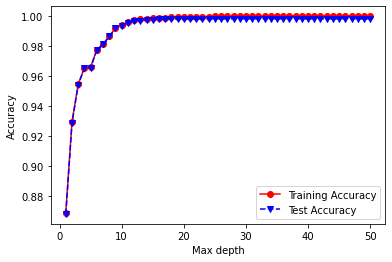

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plot

maxDepth = np.arange(1, 51)
trainAccuracy = np.zeros(50)
testAccuracy = np.zeros(50)
for i in range(1, 51):    
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxDepth[i - 1])
    clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)

    y_pred_train = clf.predict(x_train.loc[:, 'PC1':'PC10'])
    trainAccuracy[i - 1] = accuracy_score(y_train, y_pred_train)
    y_pred = clf.predict(x_test.loc[:, 'PC1':'PC10'])
    testAccuracy[i - 1] = accuracy_score(y_test, y_pred)

plot.plot(maxDepth, trainAccuracy,'ro-', maxDepth,testAccuracy,'bv--')
plot.legend(['Training Accuracy', 'Test Accuracy'])
plot.xlabel('Max depth')
plot.ylabel('Accuracy')   

### Decision tree applying on data

In [8]:
maxDepth = 5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxDepth)
clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)

y_pred_train = clf.predict(x_train.loc[:, 'PC1':'PC10'])
y_pred = clf.predict(x_test.loc[:, 'PC1':'PC10'])
y_pred = pd.Series(y_pred, name='Predicted Class')
y_pred.index = x_test.index
predictions = pd.concat([x_test, y_pred, y_test], axis=1)
print('Decision tree with max depth = {}'.format(maxDepth))
print('Accuracy on training data is {}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy on testing data is  {}'.format(accuracy_score(y_test, y_pred)))    

Decision tree with max depth = 5
Accuracy on training data is 0.9662944926308785
Accuracy on testing data is  0.9655975544664952


### Decision tree classifier

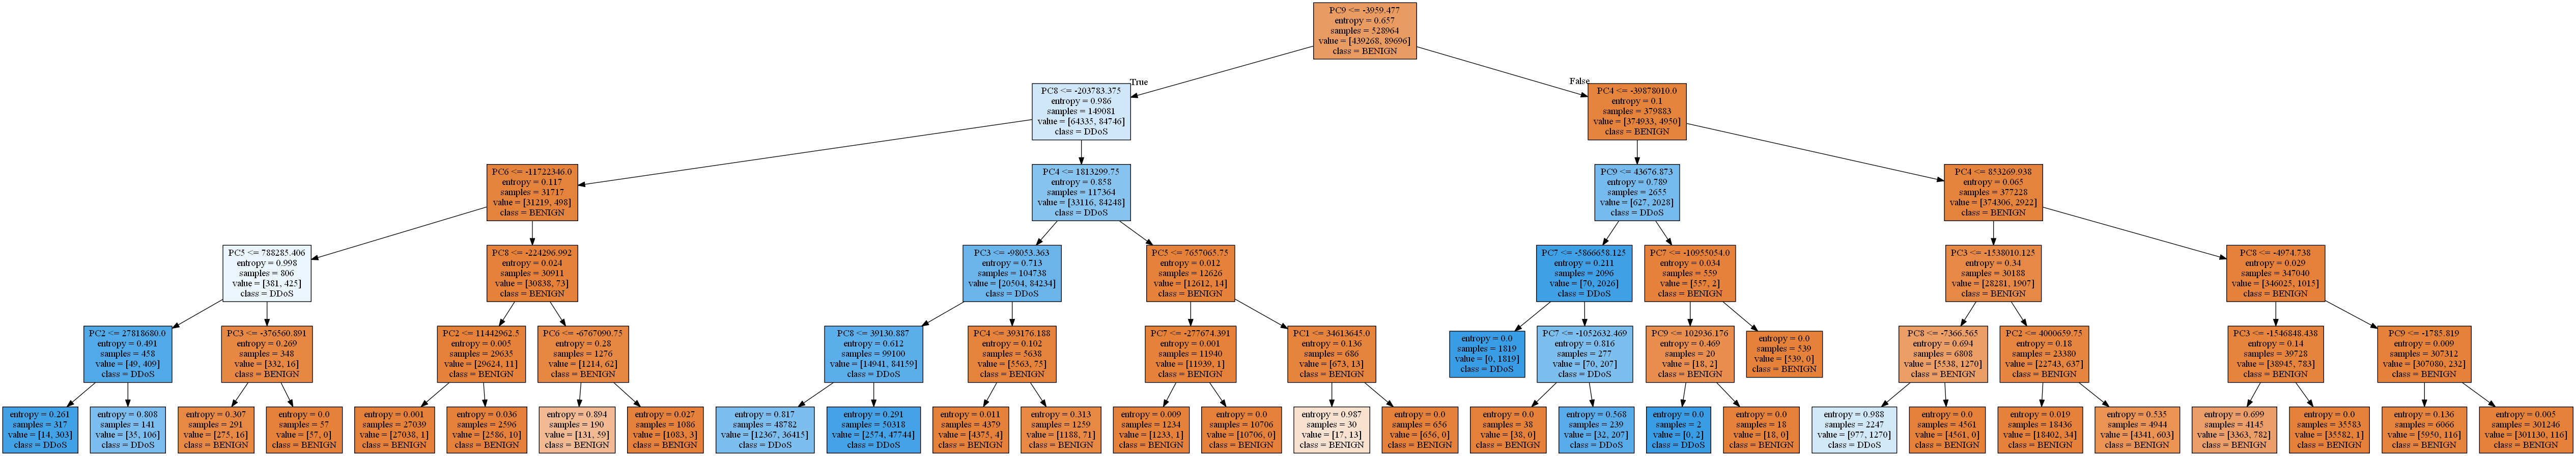

In [9]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=new.loc[:, 'PC1':'PC10'].columns, class_names=['BENIGN','DDoS'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## K-nearest neighbors

### Hyperparameter k tunning

Text(0, 0.5, 'Accuracy')

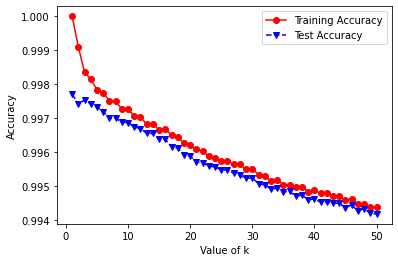

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = np.arange(1, 51)
trainAccuracy = np.zeros(50)
testAccuracy = np.zeros(50)
for i in range(1, 51):    
    clf = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)

    y_pred_train = clf.predict(x_train.loc[:, 'PC1':'PC10'])
    trainAccuracy[i - 1] = accuracy_score(y_train, y_pred_train)
    y_pred = clf.predict(x_test.loc[:, 'PC1':'PC10'])
    testAccuracy[i - 1] = accuracy_score(y_test, y_pred)

plot.plot(k, trainAccuracy,'ro-', k ,testAccuracy,'bv--')
plot.legend(['Training Accuracy', 'Test Accuracy'])
plot.xlabel('Value of k')
plot.ylabel('Accuracy')   

### K-nearest neighbor applying on data

In [11]:
k = 3
clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)

y_pred_train = clf.predict(x_train.loc[:, 'PC1':'PC10'])
y_pred = clf.predict(x_test.loc[:, 'PC1':'PC10'])
y_pred = pd.Series(y_pred, name='Predicted Class')
y_pred.index = x_test.index
predictions = pd.concat([x_test, y_pred, y_test], axis=1)

print('K-nearest neighbors with k = {}'.format(k))
print('Accuracy on training data is {}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy on testing data is  {}'.format(accuracy_score(y_test, y_pred)))    

K-nearest neighbors with k = 3
Accuracy on training data is 0.9983496041318501
Accuracy on testing data is  0.9975429975429976


## Artificial Neural Network: Perceptron

### With PCA

In [12]:
from sklearn.linear_model import Perceptron

# run perceptron with PCA
clf = Perceptron(tol=1e-3, random_state=2)
clf = clf.fit(x_train.loc[:, 'PC1':'PC10'], y_train)

y_pred_train = clf.predict(x_train.loc[:, 'PC1':'PC10'])
y_pred = clf.predict(x_test.loc[:, 'PC1':'PC10'])
y_pred = pd.Series(y_pred, name='Predicted Class')
y_pred.index = x_test.index
predictions = pd.concat([x_test, y_pred, y_test], axis=1)

print('Perceptron with PCA:')
print('Accuracy on training data is {}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy on testing data is  {}'.format(accuracy_score(y_test, y_pred)))    

Perceptron with PCA:
Accuracy on training data is 0.8672953168835686
Accuracy on testing data is  0.8672380557479301


### Without PCA

In [13]:
# run perceptron without PCA
y_original = data.loc[:, 'Label']
x_original = data.drop(['Label'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, test_size=0.3, random_state=2)

clf = Perceptron(tol=1e-3, random_state=2)
clf = clf.fit(x_train.loc[:, 'Flow Duration':'Idle Min'], y_train)

y_pred_train = clf.predict(x_train.loc[:, 'Flow Duration':'Idle Min'])
y_pred = clf.predict(x_test.loc[:, 'Flow Duration':'Idle Min'])
y_pred = pd.Series(y_pred, name='Predicted Class')
y_pred.index = x_test.index
predictions = pd.concat([x_test, y_pred, y_test], axis=1)

print('Perceptron without PCA:')
print('Accuracy on training data is {}'.format(accuracy_score(y_train, y_pred_train)))
print('Accuracy on testing data is  {}'.format(accuracy_score(y_test, y_pred)))    

Perceptron without PCA:
Accuracy on training data is 0.8602702641389585
Accuracy on testing data is  0.8600170269829157


# 4. Data visualization

In [14]:
# stratification subsetting the dataset to visualize
# x, y are results from the dataset that was applied PCA
x_taken, x_left, y_taken, y_left = train_test_split(x, y, test_size=0.5, random_state=2, stratify=y)
x_taken = x_taken.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'], axis=1)
visualizedData = pd.concat([x_taken, y_taken], axis=1)
print('Number of objects in the subset to be visualized: {}'.format(visualizedData.shape[0]))
visualizedData.head(20)

Number of objects in the subset to be visualized: 377831


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Label
45387,-9.586884e+05,2.227568e+06,-1.391430e+06,-8.307002e+06,7.456210e+06,2.102337e+06,4.677273e+06,-354558.006661,2128.924694,8.238052e+06,BENIGN
675305,-2.330648e+07,4.753375e+05,-1.527736e+06,9.361697e+05,-6.244303e+05,6.350010e+05,-3.375668e+05,114818.447466,-36270.473226,-6.220080e+05,DDoS
92638,-1.970141e+07,-8.817201e+05,-1.490109e+06,2.146939e+06,-1.538599e+06,1.932758e+06,7.353248e+05,24690.384233,5155.271257,-1.782142e+05,BENIGN
248279,1.444230e+08,-1.097332e+08,7.922564e+05,-7.133077e+06,1.201362e+07,-1.063179e+07,-2.971634e+06,-489550.360043,-72313.430108,9.596374e+05,BENIGN
248506,-2.403127e+07,5.203969e+05,-1.543236e+06,9.107301e+05,-3.406836e+05,1.744912e+05,-2.999749e+05,-3522.207916,-585.556088,-1.360874e+05,BENIGN
577823,-2.384816e+07,5.346966e+05,-1.465710e+06,8.618296e+05,-4.417512e+05,3.223072e+05,-3.687758e+05,61906.933803,-17247.527310,-3.791524e+05,DDoS
20623,-2.409737e+07,5.413761e+05,2.454209e+06,8.976620e+05,-3.541279e+05,1.709918e+05,-3.264311e+05,-4961.289152,-813.707663,-1.241255e+05,BENIGN
176252,5.186786e+07,-3.547907e+07,-5.529985e+05,-2.824715e+05,-3.882638e+06,-3.477109e+06,1.375656e+05,268721.869453,5807.047431,-3.479362e+06,BENIGN
415662,-2.405844e+07,5.184530e+05,-1.293279e+06,9.173345e+05,-3.584427e+05,1.729877e+05,-3.292950e+05,-4432.885852,-635.906700,-1.246011e+05,BENIGN
345324,-2.407971e+07,5.312800e+05,7.925765e+05,9.061007e+05,-3.559060e+05,1.718922e+05,-3.274623e+05,-4123.791988,-890.586713,-1.240289e+05,BENIGN


<AxesSubplot:>

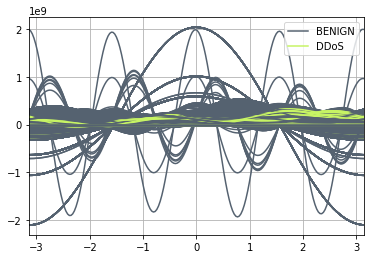

In [15]:
# Andrews' curves plot
pd.plotting.andrews_curves(visualizedData, 'Label', color=('#556270', '#C7F464'))